In [1]:
#TCP SYN ATTACK ANALYSIS ISM PROJECT
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"revised_kddcup_dataset.csv",index_col=0)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [4]:
tcp_syn_df = df[df.loc[:,"protocol_type"] == "tcp"]

In [5]:
tcp_syn_df = tcp_syn_df[tcp_syn_df.loc[:,"srv_serror_rate"] > 0.7]

In [6]:
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,X11,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,X11,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,finger,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [7]:
#there are no null values from previous knowledge

In [8]:
#converting categorical data to numerical data
service_values = np.unique(tcp_syn_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    tcp_syn_df = tcp_syn_df.replace(service_values[i], (i-mid)/10)

In [9]:
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,-2.8,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,-2.8,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,-1.5,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [10]:
#I will be extracting all the important features as a "priority" for preprocessing
features = ["service","src_bytes","wrong_fragment","count","num_compromised","srv_count","srv_serror_rate","serror_rate"]
target = "result"

In [11]:
X = tcp_syn_df.loc[:,features]
y =tcp_syn_df.loc[:,target]




In [12]:
classes = np.unique(y)
print(classes)

['apache2.' 'guess_passwd.' 'land.' 'mscan.' 'neptune.' 'nmap.' 'normal.'
 'processtable.' 'saint.' 'satan.' 'warezmaster.' 'xsnoop.']


In [13]:
tcp_syn_df['result'].unique()

array(['normal.', 'xsnoop.', 'saint.', 'apache2.', 'guess_passwd.',
       'satan.', 'mscan.', 'processtable.', 'warezmaster.', 'nmap.',
       'neptune.', 'land.'], dtype=object)

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
tcp_syn_df['result']= label_encoder.fit_transform(tcp_syn_df['result'])
tcp_syn_df['result'].unique()

array([ 6, 11,  8,  0,  1,  9,  3,  7, 10,  5,  4,  2])

In [15]:
#turning the service attribute to categorical values
tcp_syn_df=tcp_syn_df.replace("eco_i",-0.1)
tcp_syn_df=tcp_syn_df.replace("ecr_i",0.0)
tcp_syn_df=tcp_syn_df.replace("tim_i",0.1)
tcp_syn_df=tcp_syn_df.replace("urp_i",0.2)

In [16]:
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,-2.8,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,6
8105,0,tcp,-2.8,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,11
34836,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,8
34841,0,tcp,-1.5,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,8
34864,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,8


In [17]:
y =tcp_syn_df.loc[:,target]

[]

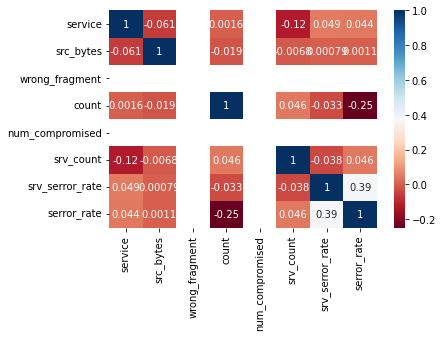

In [18]:
#I selected certain features but I will have to find some covariance between them so I will plot a covariance heatmap
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

count              0.417676
service            0.291770
srv_count          0.206192
serror_rate        0.063749
src_bytes          0.017669
srv_serror_rate    0.002944
wrong_fragment     0.000000
num_compromised    0.000000
dtype: float64


In [21]:
#updated feature selection to release overfitting and accuracy improvement
#in generalised prediction
X = X.loc[:,["service","count","srv_count","src_bytes","serror_rate"]]
for i in X.index:
    if y[i] == 0:
        print(i,":",X.loc[i,:])

40821 : service        -1.00
count          29.00
srv_count      29.00
src_bytes       0.00
serror_rate     0.79
Name: 40821, dtype: float64
40822 : service        -1.0
count          30.0
srv_count      30.0
src_bytes       0.0
serror_rate     0.8
Name: 40822, dtype: float64
40823 : service        -1.00
count          31.00
srv_count      31.00
src_bytes       0.00
serror_rate     0.81
Name: 40823, dtype: float64
40824 : service        -1.00
count          32.00
srv_count      32.00
src_bytes       0.00
serror_rate     0.81
Name: 40824, dtype: float64
40825 : service        -1.00
count          33.00
srv_count      33.00
src_bytes       0.00
serror_rate     0.82
Name: 40825, dtype: float64
40826 : service        -1.00
count          34.00
srv_count      34.00
src_bytes       0.00
serror_rate     0.82
Name: 40826, dtype: float64
40827 : service        -1.00
count          35.00
srv_count      35.00
src_bytes       0.00
serror_rate     0.83
Name: 40827, dtype: float64
40828 : service   

In [22]:
print(list(X.loc[136565 ,:]))#there are 5 attributes now
print(y[136565 ])

[-1.5, 1.0, 2.0, 0.0, 1.0]
2


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### ML Models: 

### 1.***Logistic Regression***
### 2.***K Nearest Neighbours***
### 3.***MLP Classifier***
### 4.***Decision Tree***
### 5.***SVM***
### 6.***Naive Bayes***
### 7.***RandomForest Classification***
### 8.***Adaboost***
### 9.***Gradient Boosting***
### 10.***XGBoost***

In [25]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier(),SVC(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
classifiers = ["LR", "KNN","MLP","DT","SVM","NB","RF","AdaBoost","GB","XGB"]
scores = []

In [26]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Accuracy of the model is:  98.20808191625525
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    2    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0]
 [  22    0    0    0    0    0    0   25    0    0]
 [   0    0    0    0 5203    0    0    1    0    0]
 [   0    0    0    0    0    0    0   23    0    0]
 [   0    0    0    0    0    0    4    1    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    2    0    0    0    0   12]
 [   0    0    0    0    7    0    0    0    0   17]]
Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        65
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        47
           4       1.00      1.00      1.00      5204
           5       0.00      0.00      0.00        23
           6     

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  97.42183214481624
Confusion Matrix:
 [[  53    0    0    0    3    0    0    9    0    0]
 [   0    0    0    0    0    0    2    0    0    0]
 [   0    0    0    0    0    0    0    3    0    0]
 [   0    0    0    0    0    0    0   47    0    0]
 [  24    0    0    0 5173    0    0    7    0    0]
 [   0    0    0    0    0    0    0   23    0    0]
 [   0    0    0    0    0    0    3    2    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    2    0    0    0    0   12]
 [   0    0    0    0    7    0    0    0    0   17]]
Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        65
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        47
           4       1.00      0.99      1.00      5204
           5       0.00      0.00      0.00        23
           6     

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metr

Accuracy of the model is:  99.70744194551106
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    1    0    0    0]
 [   0    0    0   45    0    0    0    2    0    0]
 [   2    0    0    0 5200    0    0    1    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   0    0    0    0    0    2    3    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    1    0    0    0   10    3]
 [   0    0    0    0    2    0    0    0    1   21]]
Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00      5204
           5       0.92      1.00      0.96        23
           6     

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  99.28688974218322
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    3    0    0    0    0]
 [   0    0    0   23    0   22    0    2    0    0]
 [   2    0    0    0 5200    0    0    1    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   0    1    0    0    0    1    3    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    0    0    0    0   11    3]
 [   0    0    0    0    2    0    0    0    1   21]]
Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         3
           3       1.00      0.49      0.66        47
           4       1.00      1.00      1.00      5204
           5       0.47      1.00      0.64        23
           6     

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\xgboost\skle

[21:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the model is:  99.72572682391662
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]
 [   0    0    0   45    0    0    0    2    0    0]
 [   2    0    0    0 5200    0    0    1    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   1    0    0    0    0    2    2    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    0    0    0    0   11    3]
 [   0    0    0    0    0    0    0    0    3   21]]
Report:
               precision    recall  f1-score   support

           0       0.96      1

### ***An array of all accuracies of the models***

In [27]:
scores=scores[:10]
scores

[98.20808191625525,
 99.4697385262388,
 99.34174437739989,
 99.70744194551106,
 97.42183214481624,
 99.17718047174986,
 99.70744194551106,
 96.5990126165661,
 99.28688974218322,
 99.72572682391662]

### ***Plotting of the accuracies of all models***

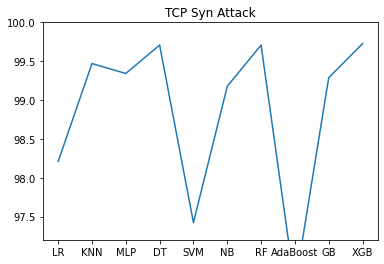

In [28]:
plt.plot(classifiers,scores)
plt.title("TCP Syn Attack")
plt.ylim(97.2,100)
plt.show()

### ***Sample Model Running Codes***

In [35]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  98.20808191625525
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    2    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0]
 [  22    0    0    0    0    0    0   25    0    0]
 [   0    0    0    0 5203    0    0    1    0    0]
 [   0    0    0    0    0    0    0   23    0    0]
 [   0    0    0    0    0    0    4    1    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    2    0    0    0    0   12]
 [   0    0    0    0    7    0    0    0    0   17]]
Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        65
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        47
           4       1.00      1.00      1.00      5204
           5       0.00      0.00      0.00        23
           6       0

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [36]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)

model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  99.4697385262388
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    2    0    1    0    0    0    0    0]
 [   0    0    0   45    0    0    0    2    0    0]
 [   8    0    0    0 5195    0    0    1    0    0]
 [   0    0    0    0    0   23    0    0    0    0]
 [   0    1    0    0    0    0    3    1    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    2    0    0    0    7    5]
 [   0    0    0    0    6    0    0    0    2   16]]
Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        65
           1       0.67      1.00      0.80         2
           2       1.00      0.67      0.80         3
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00      5204
           5       1.00      1.00      1.00        23
           6       1.

In [37]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(alpha=0.005)

model_mlp.fit(X_train,y_train)
y_pred = model_mlp.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  99.30517462058877
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0    0    0]
 [   0    0    0   35    0   10    0    2    0    0]
 [   0    0    0    0 5203    0    0    1    0    0]
 [   0    0    0    0    0   23    0    0    0    0]
 [   0    1    0    1    0    0    3    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    1    0    0    0    0   13]
 [   0    0    0    0    6    0    0    0    0   18]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         3
           3       0.90      0.74      0.81        47
           4       1.00      1.00      1.00      5204
           5       0.70      1.00      0.82        23
           6       1

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  99.72572682391662
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]
 [   0    0    0   45    0    0    0    2    0    0]
 [   2    0    0    0 5200    0    0    1    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   1    0    0    0    0    2    2    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    0    0    0    0   11    3]
 [   0    0    0    0    2    0    0    0    1   21]]
Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00      5204
           5       0.92      1.00      0.96        23
           6       1

In [29]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  97.42183214481624
Confusion Matrix:
 [[  53    0    0    0    3    0    0    9    0    0]
 [   0    0    0    0    0    0    2    0    0    0]
 [   0    0    0    0    0    0    0    3    0    0]
 [   0    0    0    0    0    0    0   47    0    0]
 [  24    0    0    0 5173    0    0    7    0    0]
 [   0    0    0    0    0    0    0   23    0    0]
 [   0    0    0    0    0    0    3    2    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    2    0    0    0    0   12]
 [   0    0    0    0    7    0    0    0    0   17]]
Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        65
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        47
           4       1.00      0.99      1.00      5204
           5       0.00      0.00      0.00        23
           6       0

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.naive_bayes import GaussianNB

model_bayes = GaussianNB()

model_bayes.fit(X_train,y_train)
y_pred = model_bayes.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


Accuracy of  model is:  99.17718047174986
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0    0    0]
 [   0    0    0   35    0   10    0    2    0    0]
 [   8    0    0    0 5195    0    0    0    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   0    0    0    0    0    0    5    0    0    0]
 [   0    0    0    0    3    0    0   79    0    0]
 [   0    0    0    0    1    0    0    0    1   12]
 [   0    0    0    0    0    0    0    0    5   19]]
Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        65
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       0.92      0.74      0.82        47
           4       1.00      1.00      1.00      5204
           5       0.70      1.00      0.82        23
           6       1

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


Accuracy of  model is:  99.70744194551106
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    1    0    0    0]
 [   0    0    0   45    0    0    0    2    0    0]
 [   2    0    0    0 5200    0    0    1    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   0    0    0    0    0    2    3    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    0    0    0    0   10    4]
 [   0    0    0    0    2    0    0    0    1   21]]
Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00      5204
           5       0.92      1.00      0.96        23
           6       0

In [32]:
from sklearn.ensemble import AdaBoostClassifier

model_adc = AdaBoostClassifier()

print()
model_adc.fit(X_train,y_train)
y_pred = model_adc.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")



Accuracy of  model is:  96.5990126165661
Confusion Matrix:
 [[   0    0    0    0   54    0    0   11    0    0]
 [   0    0    0    0    0    0    2    0    0    0]
 [   0    0    0    0    0    0    0    3    0    0]
 [   0    0    0    0    0    0    0   47    0    0]
 [   0    0    0    0 5197    0    0    7    0    0]
 [   0    0    0    0    0    0    0   23    0    0]
 [   0    0    0    0    0    0    4    1    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0   14    0    0    0    0    0]
 [   0    0    0    0   24    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        47
           4       0.98      1.00      0.99      5204
           5       0.00      0.00      0.00        23
           6       0

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

print()
model_gb.fit(X_train,y_train)
y_pred = model_gb.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")



Accuracy of  model is:  99.28688974218322
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    3    0    0    0    0]
 [   0    0    0   23    0   22    0    2    0    0]
 [   2    0    0    0 5200    0    0    1    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   0    1    0    0    0    1    3    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    0    0    0    0   11    3]
 [   0    0    0    0    2    0    0    0    1   21]]
Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         3
           3       1.00      0.49      0.66        47
           4       1.00      1.00      1.00      5204
           5       0.47      1.00      0.64        23
           6       

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


[21:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy of  model is:  99.72572682391662
Confusion Matrix:
 [[  65    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]
 [   0    0    0   45    0    0    0    2    0    0]
 [   2    0    0    0 5200    0    0    1    0    1]
 [   0    0    0    0    0   23    0    0    0    0]
 [   1    0    0    0    0    2    2    0    0    0]
 [   0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    0    0    0    0   11    3]
 [   0    0    0    0    0    0    0    0    3   21]]
Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00      5204
           5       0.92      1.00      0.96        23
           6       1